In [1]:
import cv2 

# img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
# print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [3]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [5]:
def count_images_in_directory(directory):
    count = 0
    for filename in os.listdir(directory):
        if re.search(r"\.(jpg|jpeg|png|bmp|tiff)$", filename):
            count += 1
            filepath = os.path.join(directory, filename)
            image = plt.imread(filepath)
            if len(image.shape) == 3:
                images.append(image)
            else:
                print(f"Ignorando imagen no válida: {filepath}")

    return count

dirname = os.path.join(os.getcwd(), '/Users/ulises/PruebaDatasetFlowers')
imgpath = dirname + os.sep

images = []
directories = []
dircount = []

print("Leyendo imágenes de", imgpath)

for root, dirnames, _ in os.walk(imgpath):
    if root != imgpath:  # Ignorar el directorio raíz inicial
        count = count_images_in_directory(root)
        print(f"{root} {count}")
        directories.append(root)
        dircount.append(count)

print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio", dircount)
print('Suma total de imágenes en subdirectorios:', sum(dircount))


Leyendo imágenes de /Users/ulises/PruebaDatasetFlowers/
/Users/ulises/PruebaDatasetFlowers/tulip_aumentada_Plus 10000
/Users/ulises/PruebaDatasetFlowers/sunflower_aumentada_Plus 10000
/Users/ulises/PruebaDatasetFlowers/rose_aumentada_Plus 10000
/Users/ulises/PruebaDatasetFlowers/iris_aumentada_Plus 10000
/Users/ulises/PruebaDatasetFlowers/bellflower_aumentada_Plus 10000
Directorios leídos: 5
Imágenes en cada directorio [10000, 10000, 10000, 10000, 10000]
Suma total de imágenes en subdirectorios: 50000


# Creamos las etiquetas

In [6]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  50000


In [7]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 tulip_aumentada_Plus
1 sunflower_aumentada_Plus
2 rose_aumentada_Plus
3 iris_aumentada_Plus
4 bellflower_aumentada_Plus


In [8]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [9]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (40000, 90, 90, 3) (40000,)
Testing data shape :  (10000, 90, 90, 3) (10000,)


Text(0.5, 1.0, 'Ground Truth : 2')

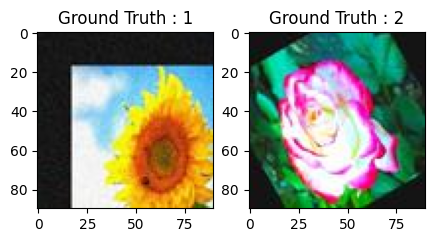

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

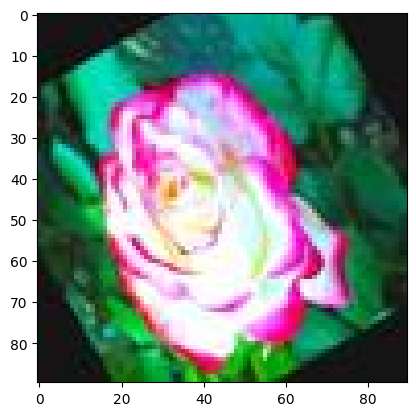

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [13]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(32000, 90, 90, 3) (8000, 90, 90, 3) (32000, 5) (8000, 5)


# Creamos el modelo de CNN

In [30]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 70 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [31]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(90,90,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [32]:
flower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        896       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 90, 90, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 45, 45, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 64800)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                2073632   
                                                      

In [33]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [34]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/70
1000/1000 [==============================] - 88s 87ms/step - loss: 1.2734 - accuracy: 0.4444 - val_loss: 0.9701 - val_accuracy: 0.6316
Epoch 2/70
1000/1000 [==============================] - 77s 77ms/step - loss: 1.0306 - accuracy: 0.5795 - val_loss: 0.8653 - val_accuracy: 0.6644
Epoch 3/70
1000/1000 [==============================] - 70s 69ms/step - loss: 0.9516 - accuracy: 0.6151 - val_loss: 0.8156 - val_accuracy: 0.6830
Epoch 4/70
1000/1000 [==============================] - 67s 67ms/step - loss: 0.9008 - accuracy: 0.6403 - val_loss: 0.7775 - val_accuracy: 0.7009
Epoch 5/70
1000/1000 [==============================] - 66s 66ms/step - loss: 0.8682 - accuracy: 0.6510 - val_loss: 0.7429 - val_accuracy: 0.7091
Epoch 6/70
1000/1000 [==============================] - 68s 68ms/step - loss: 0.8359 - accuracy: 0.6670 - val_loss: 0.7242 - val_accuracy: 0.7189
Epoch 7/70
1000/1000 [==============================] - 65s 65ms/step - loss: 0.8155 - accuracy: 0.6756 - val_loss: 0.7093 -

In [36]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("/Users/ulises/CNN/celulasFlores2.h5py")

INFO:tensorflow:Assets written to: /Users/ulises/CNN/celulasFlores2.h5py/assets


INFO:tensorflow:Assets written to: /Users/ulises/CNN/celulasFlores2.h5py/assets


# Evaluamos la red

In [37]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 5s 15ms/step - loss: 0.4827 - accuracy: 0.8186


In [38]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4826675355434418
Test accuracy: 0.8185999989509583


In [39]:
flower_model.history

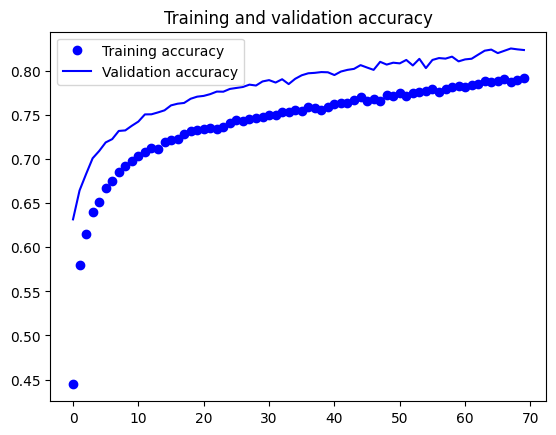

In [40]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
predicted_classes2 = flower_model.predict(test_X)

313/313 [==============================] - 4s 13ms/step


In [42]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [43]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

# Aprendamos de los errores: Qué mejorar

In [45]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(90,90,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

Found 8186 correct labels


Found 1814 incorrect labels


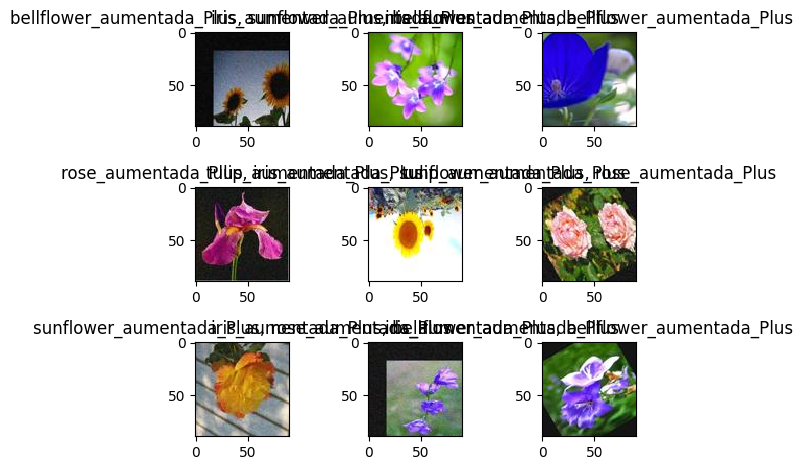

In [46]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(90,90,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [47]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.78      0.79      2000
     Class 1       0.92      0.96      0.94      1972
     Class 2       0.82      0.80      0.81      2025
     Class 3       0.76      0.80      0.78      1971
     Class 4       0.79      0.75      0.77      2032

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [1]:
from keras.models import load_model

# Ruta al modelo guardado
model_path = "/Users/ulises/CNN/celulasFlores2.h5py"
flower_model = load_model(model_path)


2023-12-12 07:28:12.728564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Ruta de la imagen de entrada
input_image_path = "/Users/ulises/Downloads/sunflower2.jpg"
input_image = plt.imread(input_image_path)

# Definir target_shape
target_shape = (90, 90)

# Ajusta al tamaño esperado
input_image = cv2.resize(input_image, target_shape)

# Agrega una dimensión adicional para el lote
input_image = np.array([input_image])


1/1 [==============================] - 0s 30ms/step


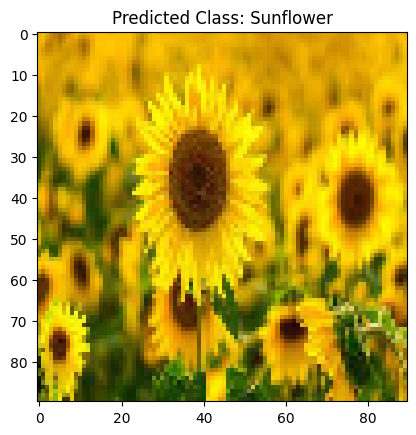

In [16]:
input_image = plt.imread(input_image_path)

# Define las dimensiones esperadas por el modelo
expected_shape = (90, 90)

# Redimensiona la imagen de entrada
resized_image = cv2.resize(input_image, expected_shape)

# Añade la dimensión del lote (batch dimension)
input_image = np.array([resized_image])

# Realiza la predicción
predicted_class_probs = flower_model.predict(input_image)
predicted_class = np.argmax(predicted_class_probs)

# Obtiene el nombre de la clase a partir del número de clase
class_names = {0: 'Tulip', 1: 'Sunflower', 2: 'Rose', 3: 'Iris', 4: 'Bellflower'}  # Ajusta este diccionario según tus nombres de clases
predicted_class_name = class_names.get(predicted_class, 'Desconocido')

# Muestra la imagen y el nombre de la clase predicha
plt.imshow(resized_image)
plt.title("Predicted Class: {}".format(predicted_class_name))
plt.show()
